In [2]:
pip install pyreadr pandas numpy scikit-learn matplotlib seaborn tensorflow joblib


   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.4 MB 1.2 MB/s eta 0:00:02
   ------------- -------------------------- 0.8/2.4 MB 1.3 MB/s eta 0:00:02
   ----------------- ---------------------- 1.0/2.4 MB 1.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.3/2.4 MB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 1.6/2.4 MB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 1.8/2.4 MB 1.3 MB/s eta 0:00:01
   ----------------------------------- ---- 2.1/2.4 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   --------------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.2 which is incompatible.



   ---------------------------- ----------- 237.0/331.9 MB 1.0 MB/s eta 0:01:33
   ---------------------------- ----------- 237.2/331.9 MB 1.0 MB/s eta 0:01:33
   ---------------------------- ----------- 237.5/331.9 MB 1.0 MB/s eta 0:01:33
   ---------------------------- ----------- 237.8/331.9 MB 1.0 MB/s eta 0:01:33
   ---------------------------- ----------- 238.0/331.9 MB 1.0 MB/s eta 0:01:33
   ---------------------------- ----------- 238.0/331.9 MB 1.0 MB/s eta 0:01:33
   ---------------------------- ----------- 238.3/331.9 MB 1.0 MB/s eta 0:01:33
   ---------------------------- ----------- 238.6/331.9 MB 1.0 MB/s eta 0:01:33
   ---------------------------- ----------- 238.8/331.9 MB 1.0 MB/s eta 0:01:32
   ---------------------------- ----------- 238.8/331.9 MB 1.0 MB/s eta 0:01:32
   ---------------------------- ----------- 239.1/331.9 MB 1.0 MB/s eta 0:01:32
   ---------------------------- ----------- 239.3/331.9 MB 1.0 MB/s eta 0:01:32
   ---------------------------- -------

In [21]:
from pathlib import Path

import numpy as np
import pandas as pd

import pyreadr
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
import joblib
BASE_DIR = Path(".").resolve()
DATA_RAW = BASE_DIR / "data" / "raw"
DATA_PROC = BASE_DIR / "data" / "processed"
MODELS_DIR = BASE_DIR / "models"
REPORTS_DIR = BASE_DIR / "reports"

DATA_RAW.mkdir(parents=True, exist_ok=True)
DATA_PROC.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

BASE_DIR, DATA_RAW, DATA_PROC


(WindowsPath('C:/Users/Deepti Bhardwaj/OneDrive - IIT Delhi/Desktop/jupyter files'),
 WindowsPath('C:/Users/Deepti Bhardwaj/OneDrive - IIT Delhi/Desktop/jupyter files/data/raw'),
 WindowsPath('C:/Users/Deepti Bhardwaj/OneDrive - IIT Delhi/Desktop/jupyter files/data/processed'))

In [22]:
def convert_rdata_to_csv(rdata_filename, csv_filename):
    r_path = DATA_RAW / rdata_filename
    print(f"Loading {r_path}")

    result = pyreadr.read_r(r_path)
    print("Objects in file:", list(result.keys()))
    first_key = list(result.keys())[0]
    df = result[first_key]
    
    print("Shape:", df.shape)
    display(df.head())

    out_path = DATA_RAW / csv_filename
    df.to_csv(out_path, index=False)
    print(f"Saved CSV to {out_path}\n")


In [ ]:
convert_rdata_to_csv("TEP_FaultFree_Training.RData", "TEP_FaultFree_Training.csv")
convert_rdata_to_csv("TEP_FaultFree_Testing.RData", "TEP_FaultFree_Testing.csv")
convert_rdata_to_csv("TEP_Faulty_Training.RData", "TEP_Faulty_Training.csv")
convert_rdata_to_csv("TEP_Faulty_Testing.RData", "TEP_Faulty_Testing.csv")


Loading C:\Users\Deepti Bhardwaj\OneDrive - IIT Delhi\Desktop\jupyter files\data\raw\TEP_FaultFree_Training.RData
Objects in file: ['fault_free_training']
Shape: (250000, 55)


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


Saved CSV to C:\Users\Deepti Bhardwaj\OneDrive - IIT Delhi\Desktop\jupyter files\data\raw\TEP_FaultFree_Training.csv

Loading C:\Users\Deepti Bhardwaj\OneDrive - IIT Delhi\Desktop\jupyter files\data\raw\TEP_FaultFree_Testing.RData
Objects in file: ['fault_free_testing']
Shape: (480000, 55)


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,0,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,0,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,0,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,0,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681


Saved CSV to C:\Users\Deepti Bhardwaj\OneDrive - IIT Delhi\Desktop\jupyter files\data\raw\TEP_FaultFree_Testing.csv

Loading C:\Users\Deepti Bhardwaj\OneDrive - IIT Delhi\Desktop\jupyter files\data\raw\TEP_Faulty_Training.RData
Objects in file: ['faulty_training']
Shape: (5000000, 55)


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


Saved CSV to C:\Users\Deepti Bhardwaj\OneDrive - IIT Delhi\Desktop\jupyter files\data\raw\TEP_Faulty_Training.csv

Loading C:\Users\Deepti Bhardwaj\OneDrive - IIT Delhi\Desktop\jupyter files\data\raw\TEP_Faulty_Testing.RData
Objects in file: ['faulty_testing']
Shape: (9600000, 55)


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,1,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,1,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,1,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,1,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681


In [10]:
df = pd.read_csv("data/raw/TEP_FaultFree_Training.csv")
df.head()
df.shape
df.columns


Index(['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2',
       'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8',
       'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14',
       'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20',
       'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26',
       'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32',
       'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38',
       'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4',
       'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11'],
      dtype='object')

In [23]:
drop_cols = ["faultNumber", "simulationRun", "sample"]

train = pd.read_csv("data/raw/TEP_FaultFree_Training.csv")
test_normal = pd.read_csv("data/raw/TEP_FaultFree_Testing.csv")
test_faulty = pd.read_csv("data/raw/TEP_Faulty_Testing.csv")

train = train.drop(columns=drop_cols, errors="ignore")
test_normal = test_normal.drop(columns=drop_cols, errors="ignore")
test_faulty = test_faulty.drop(columns=drop_cols, errors="ignore")

print("Train shape after drop:", train.shape)
print("Normal test shape after drop:", test_normal.shape)
print("Faulty test shape after drop:", test_faulty.shape)



Train shape after drop: (250000, 52)
Normal test shape after drop: (480000, 52)
Faulty test shape after drop: (9600000, 52)


In [24]:
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np
from pathlib import Path

WINDOW = 50
DATA_PROC = Path("data/processed")
DATA_PROC.mkdir(parents=True, exist_ok=True)

def make_windows_stride(arr, w=50, stride=1):
    windows = []
    T = len(arr)
    for start in range(0, T - w + 1, stride):
        windows.append(arr[start:start+w])
    return np.stack(windows).astype("float32")  
train_array_full = train.values.astype("float32")
print("Full train array shape:", train_array_full.shape)

scaler = StandardScaler()
scaler.fit(train_array_full)
print("Scaler fitted on full train.")
N_TRAIN = min(200_000, len(train))
N_NORM  = min(200_000, len(test_normal))
N_FAULT = min(300_000, len(test_faulty))

train_sub = train.iloc[:N_TRAIN].values.astype("float32")
norm_sub  = test_normal.iloc[:N_NORM].values.astype("float32")
fault_sub = test_faulty.iloc[:N_FAULT].values.astype("float32")

print("\nSubsets (before scaling):")
print("train_sub:", train_sub.shape)
print("norm_sub:", norm_sub.shape)
print("fault_sub:", fault_sub.shape)

X_train = scaler.transform(train_sub)
X_norm  = scaler.transform(norm_sub)
X_fault = scaler.transform(fault_sub)

print("\nScaled subset shapes:")
print("X_train:", X_train.shape)
print("X_norm:", X_norm.shape)
print("X_fault:", X_fault.shape)


W_train = make_windows_stride(X_train, w=WINDOW, stride=5)
W_norm  = make_windows_stride(X_norm,  w=WINDOW, stride=10)
W_fault = make_windows_stride(X_fault, w=WINDOW, stride=10)

print("\nWindowed shapes:")
print("W_train:", W_train.shape)
print("W_norm:", W_norm.shape)
print("W_fault:", W_fault.shape)

np.save(DATA_PROC / "train_windows.npy", W_train)
np.save(DATA_PROC / "norm_windows.npy",  W_norm)
np.save(DATA_PROC / "fault_windows.npy", W_fault)
joblib.dump(scaler, DATA_PROC / "scaler.pkl")

print("\nSaved windowed arrays and scaler.")


Full train array shape: (250000, 52)
Scaler fitted on full train.

Subsets (before scaling):
train_sub: (200000, 52)
norm_sub: (200000, 52)
fault_sub: (300000, 52)

Scaled subset shapes:
X_train: (200000, 52)
X_norm: (200000, 52)
X_fault: (300000, 52)

Windowed shapes:
W_train: (39991, 50, 52)
W_norm: (19996, 50, 52)
W_fault: (29996, 50, 52)

Saved windowed arrays and scaler.


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

W_train = np.load("data/processed/train_windows.npy")
W_norm  = np.load("data/processed/norm_windows.npy")
W_fault = np.load("data/processed/fault_windows.npy")

print("Loaded:", W_train.shape, W_norm.shape, W_fault.shape)

N, w, d = W_train.shape
X_train_flat = W_train.reshape(N, w*d)
input_dim = X_train_flat.shape[1]
input_dim


Loaded: (39991, 50, 52) (19996, 50, 52) (29996, 50, 52)


2600

In [5]:
def build_autoencoder(input_dim, latent_dim=32):
    inp = keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation="relu")(inp)
    x = layers.Dense(64, activation="relu")(x)
    z = layers.Dense(latent_dim, activation="relu")(x)
    x = layers.Dense(64, activation="relu")(z)
    x = layers.Dense(128, activation="relu")(x)
    out = layers.Dense(input_dim, activation="linear")(x)

    model = keras.Model(inp, out)
    model.compile(optimizer="adam", loss="mse")
    return model

ae = build_autoencoder(input_dim, latent_dim=32)
ae.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         332,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2600)                │         335,400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689,096 (2.63 MB)

 Trainable params: 689,096 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = ae.fit(
    X_train_flat, X_train_flat,
    epochs=20,
    batch_size=256,
    validation_split=0.1,
    shuffle=True,
    verbose=1
)


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.8009 - val_loss: 0.7520
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.7380 - val_loss: 0.7320
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.7192 - val_loss: 0.7168
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.7084 - val_loss: 0.7086
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.7021 - val_loss: 0.7049
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.6997 - val_loss: 0.7028
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.6971 - val_loss: 0.7004
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.6958 - val_loss: 0.6997
Epoch 9/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.6954 - val_loss: 0.6995
Epoch 10/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.6949 - val_loss: 0.6992
Epoch 11/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.6947 - val_loss: 0.6990
Epoch 12/20
141/141 ━━━━━━━━━━━━━━━━━━━━

In [8]:
thr = np.percentile(err_norm, 99)

y_norm  = (err_norm  > thr).astype(int)
y_fault = (err_fault > thr).astype(int)

acc_norm  = (y_norm == 0).mean()
acc_fault = (y_fault == 1).mean()

print("Normal correctly non-anomalous:", acc_norm)
print("Faulty detected as anomalous:", acc_fault)
print("AVG metric:", (acc_norm + acc_fault)/2)


Normal correctly non-anomalous: 0.98999799959992
Faulty detected as anomalous: 0.6579543939191892
AVG metric: 0.8239761967595546


In [29]:
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np
from pathlib import Path

WINDOW = 100                  
DATA_PROC = Path("data/processed")
DATA_PROC.mkdir(parents=True, exist_ok=True)

def make_windows_stride(arr, w=100, stride=10):
    windows = []
    T = len(arr)
    for start in range(0, T - w + 1, stride):
        windows.append(arr[start:start+w])
    return np.stack(windows).astype("float32")

train_array_full = train.values.astype("float32")
print("Full train array shape:", train_array_full.shape)

scaler = StandardScaler()
scaler.fit(train_array_full)
print("Scaler fitted on full train.")

N_TRAIN = min(200_000, len(train))
N_NORM  = min(200_000, len(test_normal))
N_FAULT = min(300_000, len(test_faulty))  

train_sub = train.iloc[:N_TRAIN].values.astype("float32")
norm_sub  = test_normal.iloc[:N_NORM].values.astype("float32")
fault_sub = test_faulty.iloc[:N_FAULT].values.astype("float32")

print("\nSubsets (before scaling):")
print("train_sub:", train_sub.shape)
print("norm_sub:", norm_sub.shape)
print("fault_sub:", fault_sub.shape)

X_train = scaler.transform(train_sub)
X_norm  = scaler.transform(norm_sub)
X_fault = scaler.transform(fault_sub)

print("\nScaled subset shapes:")
print("X_train:", X_train.shape)
print("X_norm:", X_norm.shape)
print("X_fault:", X_fault.shape)

W_train = make_windows_stride(X_train, w=WINDOW, stride=10)
W_norm  = make_windows_stride(X_norm,  w=WINDOW, stride=10)
W_fault = make_windows_stride(X_fault, w=WINDOW, stride=10)

print("\nWindowed shapes:")
print("W_train:", W_train.shape)
print("W_norm:", W_norm.shape)
print("W_fault:", W_fault.shape)


np.save(DATA_PROC / "train_windows.npy", W_train)
np.save(DATA_PROC / "norm_windows.npy",  W_norm)
np.save(DATA_PROC / "fault_windows.npy", W_fault)
joblib.dump(scaler, DATA_PROC / "scaler.pkl")

print("\nSaved windowed arrays and scaler.")


Full train array shape: (250000, 52)
Scaler fitted on full train.

Subsets (before scaling):
train_sub: (200000, 52)
norm_sub: (200000, 52)
fault_sub: (300000, 52)

Scaled subset shapes:
X_train: (200000, 52)
X_norm: (200000, 52)
X_fault: (300000, 52)

Windowed shapes:
W_train: (19991, 100, 52)
W_norm: (19991, 100, 52)
W_fault: (29991, 100, 52)

Saved windowed arrays and scaler.


In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import numpy as np

DATA_PROC = Path("data/processed")

W_train = np.load(DATA_PROC / "train_windows.npy")
W_norm  = np.load(DATA_PROC / "norm_windows.npy")
W_fault = np.load(DATA_PROC / "fault_windows.npy")

print("Loaded shapes:")
print("Train:", W_train.shape)
print("Normal:", W_norm.shape)
print("Faulty:", W_fault.shape)

N, w, d = W_train.shape
X_train_flat = W_train.reshape(N, w * d)
input_dim = X_train_flat.shape[1]
input_dim


Loaded shapes:
Train: (19991, 100, 52)
Normal: (19991, 100, 52)
Faulty: (29991, 100, 52)


5200

In [27]:
def build_autoencoder(input_dim, latent_dim=4):   
    inp = keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation="relu")(inp)
    x = layers.Dense(64, activation="relu")(x)

    z = layers.Dense(latent_dim, activation="relu")(x)

    x = layers.Dense(64, activation="relu")(z)
    x = layers.Dense(128, activation="relu")(x)
    out = layers.Dense(input_dim, activation="linear")(x)

    model = keras.Model(inp, out)
    model.compile(optimizer="adam", loss="mse")
    return model

ae = build_autoencoder(input_dim, latent_dim=4)
ae.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 5200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         665,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5200)                │         670,800 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,353,684 (5.16 MB)

 Trainable params: 1,353,684 (5.16 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = ae.fit(
    X_train_flat, X_train_flat,
    epochs=40,           
    batch_size=256,
    validation_split=0.1,
    shuffle=True,
    verbose=1
)


Epoch 1/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 0.7760 - val_loss: 0.8107
Epoch 2/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.7758 - val_loss: 0.8112
Epoch 3/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 0.7759 - val_loss: 0.8115
Epoch 4/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - loss: 0.7757 - val_loss: 0.8111
Epoch 5/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.7756 - val_loss: 0.8120
Epoch 6/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 0.7758 - val_loss: 0.8115
Epoch 7/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.7758 - val_loss: 0.8117
Epoch 8/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.7753 - val_loss: 0.8128
Epoch 9/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.7751 - val_loss: 0.8125
Epoch 10/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.7748 - val_loss: 0.8126
Epoch 11/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - loss: 0.7747 - val_loss: 0.8140
Epoch 12/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms

In [17]:
err_norm  = recon_error(ae, X_norm_flat)
err_fault = recon_error(ae, X_fault_flat)


In [18]:
percentiles = [95, 97, 98, 99]

for p in percentiles:
    thr = np.percentile(err_norm, p)
    y_norm  = (err_norm  > thr).astype(int)
    y_fault = (err_fault > thr).astype(int)

    acc_norm  = (y_norm == 0).mean()
    acc_fault = (y_fault == 1).mean()
    avg = (acc_norm + acc_fault)/2

    print(f"Percentile {p}:")
    print("  Normal correctly non-anomalous:", acc_norm)
    print("  Faulty detected as anomalous  :", acc_fault)
    print("  AVG metric                    :", avg)
    print("-"*40)


Percentile 95:
  Normal correctly non-anomalous: 0.9499774898704417
  Faulty detected as anomalous  : 0.7301190357107132
  AVG metric                    : 0.8400482627905774
----------------------------------------
Percentile 97:
  Normal correctly non-anomalous: 0.969986493922265
  Faulty detected as anomalous  : 0.7159147744323296
  AVG metric                    : 0.8429506341772973
----------------------------------------
Percentile 98:
  Normal correctly non-anomalous: 0.9799909959481766
  Faulty detected as anomalous  : 0.7034110233069921
  AVG metric                    : 0.8417010096275843
----------------------------------------
Percentile 99:
  Normal correctly non-anomalous: 0.9899954979740884
  Faulty detected as anomalous  : 0.6824380647527591
  AVG metric                    : 0.8362167813634238
----------------------------------------


In [30]:
import numpy as np

best_p = 97
thr = np.percentile(err_norm, best_p)

y_norm  = (err_norm  > thr).astype(int)
y_fault = (err_fault > thr).astype(int)

acc_norm_overall  = (y_norm == 0).mean()
acc_fault_overall = (y_fault == 1).mean()
avg_overall = (acc_norm_overall + acc_fault_overall) / 2

print("=== OVERALL (all faulty windows) ===")
print("Normal correctly non-anomalous:", acc_norm_overall)
print("Faulty detected as anomalous  :", acc_fault_overall)
print("AVG metric                    :", avg_overall)

cut = len(err_fault) // 2  
err_fault_late = err_fault[cut:]
y_fault_late   = (err_fault_late > thr).astype(int)

acc_fault_late = (y_fault_late == 1).mean()

print("\n=== POST-FAULT SEGMENT (last 50% of faulty windows) ===")
print("Faulty detected as anomalous (late only):", acc_fault_late)


=== OVERALL (all faulty windows) ===
Normal correctly non-anomalous: 0.969986493922265
Faulty detected as anomalous  : 0.7159147744323296
AVG metric                    : 0.8429506341772973

=== POST-FAULT SEGMENT (last 50% of faulty windows) ===
Faulty detected as anomalous (late only): 0.7098559615897573


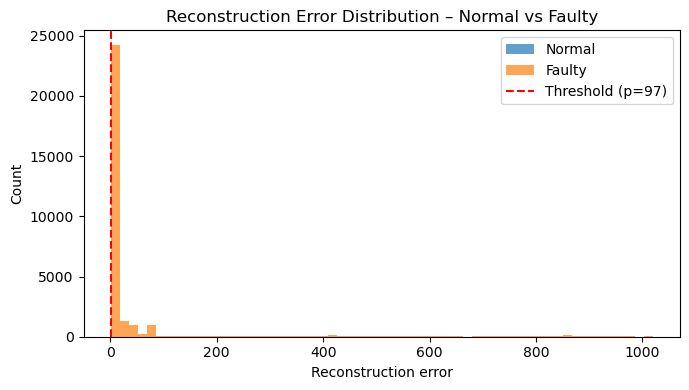

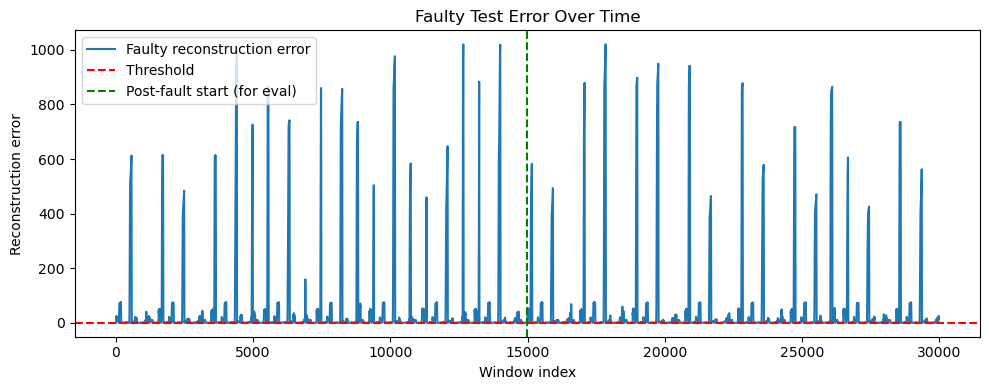

In [31]:
import matplotlib.pyplot as plt
from pathlib import Path

REPORTS = Path("reports")
REPORTS.mkdir(exist_ok=True)


plt.figure(figsize=(7,4))
plt.hist(err_norm,  bins=60, alpha=0.7, label="Normal")
plt.hist(err_fault, bins=60, alpha=0.7, label="Faulty")
plt.axvline(thr, color='red', linestyle="--", label=f"Threshold (p={best_p})")
plt.legend()
plt.title("Reconstruction Error Distribution – Normal vs Faulty")
plt.xlabel("Reconstruction error")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(REPORTS/"error_hist.png", dpi=200)
plt.show()


plt.figure(figsize=(10,4))
plt.plot(err_fault, label="Faulty reconstruction error")
plt.axhline(thr, color="red", linestyle="--", label="Threshold")
plt.axvline(len(err_fault)//2, color="green", linestyle="--", label="Post-fault start (for eval)")
plt.xlabel("Window index")
plt.ylabel("Reconstruction error")
plt.title("Faulty Test Error Over Time")
plt.legend()
plt.tight_layout()
plt.savefig(REPORTS/"fault_error_timeline.png", dpi=200)
plt.show()


In [32]:
from pathlib import Path

MODELS_DIR = Path("models")
MODELS_DIR.mkdir(exist_ok=True)

ae.save(MODELS_DIR / "autoencoder_teps.keras")
print("Model saved!")


Model saved!
